# Классификация текста

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI DL Python(БПМ)/БПМ-21/data/zayavki_text.csv')
df.head()

,text,category,id_category,norm_text
0,"1й подъезд, 5 этаж. В коридоре над висит ка...",Содержание МКД,10,й подъезд этаж в коридор над висеть какойтый п...
1,Маленькмй лифт изрисован внутри.,Содержание МКД,10,маленькмть лифт изрисовать внутри
2,реклама на светофоре,Благоустройство,3,реклама на светофор
3,"1й подъезд, 5 этаж, квартирный холл. Рааботник...",Содержание МКД,10,й подъезд этаж квартирный холл рааботник тсж л...
4,незаконная решетка на фасаде,Нарушение правил пользования общим имуществом,23,незаконный решётка на фасад


In [ ]:
#один способ векторизации
russian_stopwords = stopwords.words("russian")
vectorizer = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_cv = vectorizer.fit_transform(df['norm_text'])
text_cv = pd.DataFrame(text_cv.toarray(),columns=vectorizer.get_feature_names_out())
text_cv.head()

,httpgorodgovspbruproblems,аварийный,автомобиль,административный,администрация,адрес,арка,асфальт,асфальтовый,бак,...,щит,щиток,элемент,этаж,это,являться,ям,яма,январь,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#второй
vectorizer_tfidf = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_tfidf = vectorizer_tfidf.fit_transform(df['norm_text'])
text_tfidf = pd.DataFrame(text_tfidf.toarray(),columns=vectorizer_tfidf.get_feature_names_out())
text_tfidf.head()

,httpgorodgovspbruproblems,аварийный,автомобиль,административный,администрация,адрес,арка,асфальт,асфальтовый,бак,...,щит,щиток,элемент,этаж,это,являться,ям,яма,январь,ящик
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.202361,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.138368,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [ ]:
scal_X_cv = StandardScaler().fit_transform(text_cv)
scal_X_cv = pd.DataFrame(scal_X_cv, columns=text_cv.columns)

In [ ]:
encoder = LabelEncoder() #кодируем каждую метку класса числом
y = encoder.fit_transform(df['category'])
y = to_categorical(y)

## Пробуем взять данные с CountVectorizer

In [ ]:
X_train_full,X_test,y_train_full,y_test = train_test_split(scal_X_cv,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs =5,batch_size=5,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
7666/7666 [==============================] - 67s 9ms/step - loss: 0.4641 - accuracy: 0.8698 - val_loss: 0.3633 - val_accuracy: 0.8982
Epoch 2/5
7666/7666 [==============================] - 67s 9ms/step - loss: 0.3374 - accuracy: 0.9030 - val_loss: 0.3476 - val_accuracy: 0.9042
Epoch 3/5
7666/7666 [==============================] - 67s 9ms/step - loss: 0.2912 - accuracy: 0.9155 - val_loss: 0.3685 - val_accuracy: 0.9050
Epoch 4/5
7666/7666 [==============================] - 86s 11ms/step - loss: 0.2684 - accuracy: 0.9228 - val_loss: 0.3822 - val_accuracy: 0.9035
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4693 - accuracy: 0.8921
0.89


## А теперь TFIDF

In [ ]:
X_train_full,X_test,y_train_full,y_test = train_test_split(text_tfidf,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [ ]:
model = keras.models.Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs =5,batch_size=5,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
7666/7666 [==============================] - 78s 10ms/step - loss: 0.4098 - accuracy: 0.8791 - val_loss: 0.3216 - val_accuracy: 0.9085
Epoch 2/5
7666/7666 [==============================] - 98s 13ms/step - loss: 0.2742 - accuracy: 0.9162 - val_loss: 0.3229 - val_accuracy: 0.9065
Epoch 3/5
7666/7666 [==============================] - 75s 10ms/step - loss: 0.2212 - accuracy: 0.9313 - val_loss: 0.3138 - val_accuracy: 0.9113
Epoch 4/5
7666/7666 [==============================] - 82s 11ms/step - loss: 0.1761 - accuracy: 0.9457 - val_loss: 0.3218 - val_accuracy: 0.9128
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.4007 - accuracy: 0.9063
0.91


## Tokenizer Keras

In [ ]:
from keras.preprocessing.text import Tokenizer

Используем Tokenizer, который может векторизовать текстовый массив в список целых чисел. Каждое целое число соответствует значению в словаре, который кодирует весь корпус, причем ключами в словаре являются сами словарные термины. Вы можете добавить параметр num_words, который отвечает за настройку размера словарного запаса. Затем будут сохранены наиболее распространенные слова num_words.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['norm_text'])

X = tokenizer.texts_to_sequences(df['norm_text'])

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

20040

In [ ]:
print(df['norm_text'][0])
print(X[0])

й подъезд этаж в коридор над висеть какойтый провод возможно под напряжение председатель тсж ленинградский вечер отказываться принимать заявка на устранение более полгода
[253, 14, 10, 2, 581, 237, 275, 1775, 212, 442, 134, 2531, 1137, 313, 2034, 779, 1253, 937, 153, 1, 427, 208, 1334]


Одна из проблем, с которой мы сталкиваемся, заключается в том, что каждая текстовая последовательность в большинстве случаев имеет разную длину слов. Чтобы противостоять этому, вы можете использовать pad_sequence(), который просто дополняет последовательность слов нулями. По умолчанию он предваряет нули, но мы хотим добавить их. Обычно не имеет значения, добавляете ли вы нули в начале или после.

In [ ]:
from keras.utils import pad_sequences
maxlen = 100

X = pad_sequences(X, padding='post', maxlen=maxlen)

print(X[0, :])

[ 253   14   10    2  581  237  275 1775  212  442  134 2531 1137  313
 2034  779 1253  937  153    1  427  208 1334    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


Обратите внимание, что на данный момент наши данные все еще жестко закодированы. Мы не говорили Keras изучать новое пространство встраивания с помощью последовательных задач. Теперь вы можете использовать слой встраивания Keras, который берет ранее вычисленные целые числа и сопоставляет их плотному вектору встраивания.

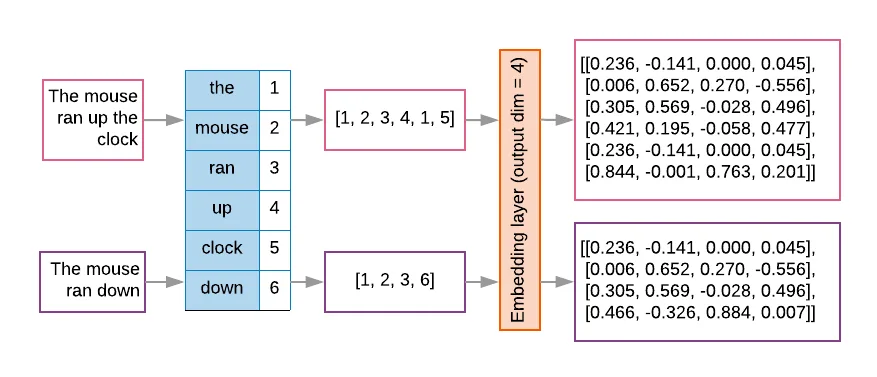

Параметры слоя
* input_dim: размер словаря
* output_dim: кол-во нейронов на выходе
* input_length: размер строки

подробное описание - https://qudata.com/ml/ru/NN_Embedding_Layer_Keras.html

In [ ]:
from keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2004000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 50)                500050    
                                                                 
 dense_1 (Dense)             (None, 15)                765       
                                                                 
Total params: 2504815 (9.56 MB)
Trainable params: 2504815 (9.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [ ]:
history=model.fit(X_train, y_train, epochs =5,batch_size=5,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
7666/7666 [==============================] - 279s 36ms/step - loss: 0.4406 - accuracy: 0.8755 - val_loss: 0.2781 - val_accuracy: 0.9189
Epoch 2/5
7666/7666 [==============================] - 264s 34ms/step - loss: 0.1840 - accuracy: 0.9444 - val_loss: 0.2785 - val_accuracy: 0.9247
Epoch 3/5
7666/7666 [==============================] - 256s 33ms/step - loss: 0.1134 - accuracy: 0.9658 - val_loss: 0.3333 - val_accuracy: 0.9171
Epoch 4/5
7666/7666 [==============================] - 254s 33ms/step - loss: 0.0859 - accuracy: 0.9747 - val_loss: 0.4095 - val_accuracy: 0.9141
Epoch 5/5
375/375 [==============================] - 1s 4ms/step - loss: 0.5612 - accuracy: 0.9093
0.91


In [ ]:
import pickle

In [ ]:
with open('encoder.pickle', 'wb') as handle:
    pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save('/content/drive/MyDrive/ML/model.h5')

## Функция для определения класса для новой заявки

In [ ]:
def predict_class(tokenizer, model,encoder, maxlen,text):
  vector = tokenizer.texts_to_sequences([text])
  vector_x = pad_sequences(vector, padding='post', maxlen=maxlen)
  y_preds = model.predict(vector_x)
  y_class = y_preds.argmax(axis=-1)
  return encoder.inverse_transform(y_class)[0]


In [ ]:
#пример с  tokenizer keras
text = "батарея холодный тепло нет холод сильный" #текст уже нормализован (ну, типа)
predict_class(tokenizer, model,encoder, maxlen,text)

1/1 [==============================] - 0s 61ms/step


'Водоснабжение'

## ЛР Классификация текста

* набор данных минимум 1000 строк, в идеале от 10k
* классика - нормализация, регистр, лемматизация
* векторизация двумя способами count vectorizer/tf-idf vectorizer (допбаллы за добавление биграмм/триграмм)
* построить сеть с обычными линейными(Dense) слоями - для единой структуры сети проверить данные с разными векторами (обучение, проверка на тестовых данных) - с учетом метрики какой способ векторизации оказался более эффективен?
* для лучшей модели построить матрицу путаницы и отчет о классификации (classification report) - сделать выводы о качестве работы классификатора в разрезе классов
* токенизировать нормализованный текст с помощью Tokenizer(Keras) и построить сеть с начальным Embbeding слоем - обучите сеть - лучше она той, что у вас была лучшей при обычной векторизации?